선형회귀(근본) > 인공신경망 > 딥러닝

### KNN Regression으로 50cm 생선의 무게 예측

In [28]:
import numpy as np

In [29]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

#### Train, Test

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_input, test_input, train_target, test_target = \
    train_test_split(fish_length, fish_weight, random_state=42)

In [32]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [33]:
# 1열로 구성된 배열로 재구성
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [56]:
print(len(train_input))
print(len(test_input))

42
14


#### KNN Regression Model

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
# 이웃의 개수를 3으로 선택
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [36]:
# 길이가 50cm인 생선의 무게 예측
knr.predict([[50]])

array([1033.33333333])

In [37]:
# 기준 데이터로 무게 확인
for i, v in list(enumerate(train_target)):
    if v == train_target.max():
        print(train_input[i], v)

[43.] 1100.0
[42.] 1100.0


In [38]:
# 사점도로 이웃을 구해서 확인하자
import matplotlib.pyplot as plt

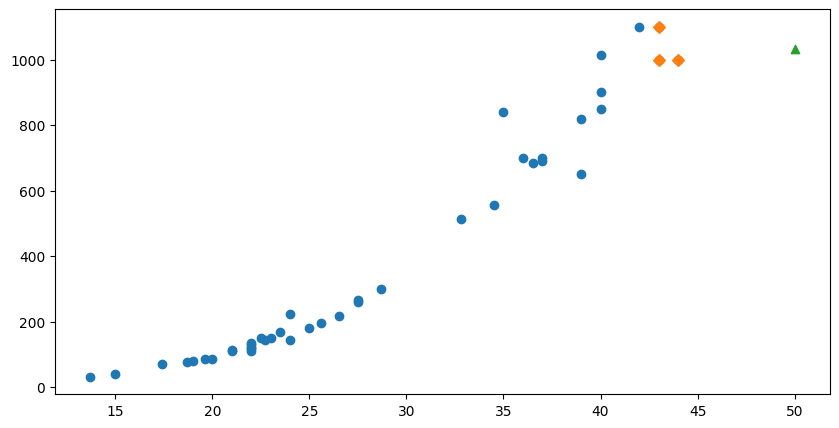

In [39]:
# 50cm 생선의 이웃을 구하자
distance, indexes = knr.kneighbors([[50]])

# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# 이웃 샘플만 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 생선 데이터
plt.scatter(50, 1033, marker='^')

plt.show()

> knn은 범위 안의 데이터에서는 잘 맞추지만      
> 범위를 벗어나면 정확도가 현저히 떨어진다

In [40]:
# 이웃들의 평균값
np.mean(train_target[indexes])

1033.3333333333333

In [41]:
knr.predict([[100]])

array([1033.33333333])

> 그래서 선형회귀식을 사용하면 된다.

- KNN은 함수식이 없고
- 선형회귀식은 함수식이 있다.

--- 
### 선형회귀(Linear Regression)
: 직선이나 곡선의 함수식(방정식)을 이용하여 구하는 방식으로 로지스틱 회귀분석이나 인공신경망의 기초가 되었다.

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [44]:
print(lr.predict([[50]]))
print(lr.predict([[100]]))

[1241.83860323]
[3192.69585141]


In [45]:
# Y=aX + b에서 기울기와 절편값을 출력(Deep Learning에서는 Weight와 Bias로 불림)

print(lr.coef_, lr.intercept_)      # 기울기는 배열 안에 있다(왜냐하면, a1X + a2X + a3X +... 이렇게 될 수 있다)
                                    # lr.intercept_   :  절편

[39.01714496] -709.0186449535474


In [46]:
# 기울기와 절편 값으로 계산
print(39.01714496 * 50 - 709.0186449535474)
print(39.01714496 * 100 - 709.0186449535474)

1241.8386030464528
3192.695851046453


## 산점도 그려보기

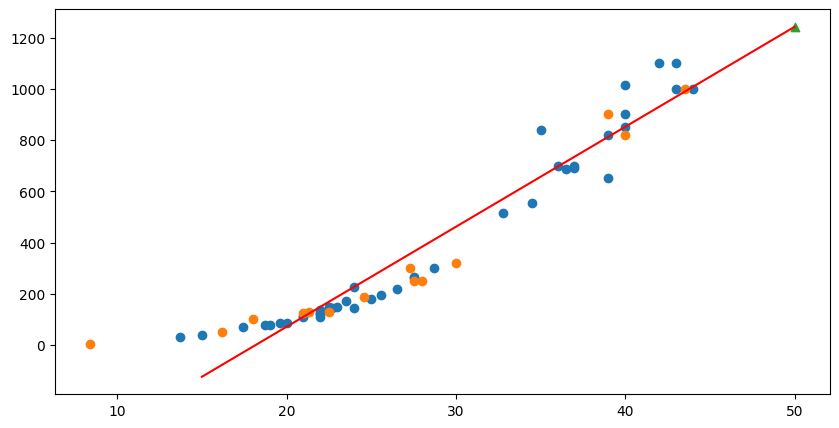

In [47]:
# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

# 15에서 50까지 1차 방정식 그래프
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_], c='red')

# 50cm 생선
plt.scatter(50, 1241.8, marker='^')

plt.show()

> 산점도의 회귀선을 보니 길이가 작아지면 무게가 음수일 경우가 발생할 수 있다. (절편이 음수)

### 과대적합과 과소적합 확인

In [48]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


> 엄청난 과대적합!!

---
### 다항 회귀       
Y= $a X^2 $ + bX + C

- 항이 여러개 있고 Feature가 하나인 것을 의미
- Feature가 여러개인 회귀는 다중회귀라고 한다.
- 특성 공학은 거의 다항회귀다.

> 다중회귀와 다르다.(y= $a X^2 + b X^3 + c X^4 $)

In [49]:
# Feature를 제곱한 column을 생성하여 기존의 Column에 붙인다.
train_poly = np.column_stack((train_input ** 2, train_input))       # ** 두배 
test_poly = np.column_stack((test_input ** 2, test_input))

In [50]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [51]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [52]:
# 50cm 생선
lr.predict([[50**2, 50]])

array([1573.98423528])

> 선형회귀의 답과 다르다

In [53]:
# 기울기와 절편
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278338


### 산점도 그리기

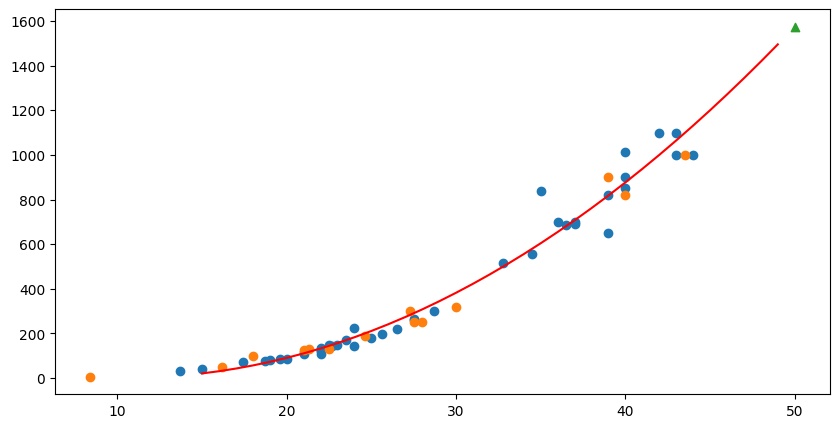

In [54]:
# 구간별 직선을 그리기 위해 15에서 49까지의 정수 배열을 만든다.
point = np.arange(15,50)

# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

# 15~50까지의 2차 방정식 그래프 (x축에 15부터 50까지 있어서 쓴 거임)
plt.plot(point, 1.01433211 * point ** 2 - 21.55792498 * point + 116.05021078278338, c='red')

# 50cm 생선
plt.scatter(50, 1574, marker='^')

plt.show()

In [55]:
# 과대 적합과 과소적합
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
